In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
diabetesdata_2015 = pd.read_csv('./DiabetesData/2015.csv')

In [3]:
len(diabetesdata_2015)

441456

In [4]:
diabetesdata_2015.shape

(441456, 330)

In [5]:
diabetesdata_2015.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [6]:
diabetesdata_2015.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENUM',
       ...
       '_PAREC1', '_PASTAE1', '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_RFSEAT2',
       '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3'],
      dtype='object', length=330)

In [7]:
diabetesdata_2015 = diabetesdata_2015[['DIABETE3', #diabetes identifier
                                       'GENHLTH', #how general health is
                                       '_AGE_G', #6-level age categorey
                                       '_BMI5CAT', #BMI assigned category
                                       'SEX', #male or female
                                       '_INCOMG', #income level
                                       '_PRACE1', #race
                                       'MARITAL', #current marital status
                                       '_EDUCAG', #highest level of education
                                       'RENTHOM1', #whether or not the interviewee is a renter or owner
                                       '_SMOKER3', #is an active smoker
                                       '_RFCHOL', #No/Yes know to high cholesterol
                                       '_MICHD', #reported having chronic health condition
                                       '_LTASTH1', #has ever been told that they have asthma
                                       'DRNKANY5', #having drank one drink of alcohol in last 30 days
                                       'FRUTDA1_',  #times per day consuming fruit
                                       'VEGEDA1_', #times per day consuming vegatable
                                       '_TOTINDA', #physical activity in past 30 days
                                      ]]

In [8]:
diabetesdata_2015_cleaned = diabetesdata_2015.dropna().copy()

In [9]:
diabetesdata_2015_cleaned.isnull().sum() #double check nulls were dropped

DIABETE3    0
GENHLTH     0
_AGE_G      0
_BMI5CAT    0
SEX         0
_INCOMG     0
_PRACE1     0
MARITAL     0
_EDUCAG     0
RENTHOM1    0
_SMOKER3    0
_RFCHOL     0
_MICHD      0
_LTASTH1    0
DRNKANY5    0
FRUTDA1_    0
VEGEDA1_    0
_TOTINDA    0
dtype: int64

In [10]:
len(diabetesdata_2015_cleaned)

322072

These classifiers were kept as is but removed the Don't Know/Refused/Missing category variously found in each one:
*DIABETE3: value of 7 and 9 correlates to 'Don't Know/Refused/Missing'

*GENHLTH: value of 7 and 9 correlates to 'Don't Know/Refused/Missing'

*_AGE_G: left as is

*_BMI5CAT: left as is

*_INCOMG: value of 9 correlates to 'Don't Know/Refused/Missing'

*_PRACE1: value of 77 and 99 correlates to 'Don't Know/Refused/Missing'

*MARITAL: value of 9 correlates to 'Don't Know/Refused/Missing'

*_EDUCAG: value of 9 correlates to 'Don't Know/Refused/Missing'

*RENTHOM1: value of 3 and 7 and 9 correlates to 'Don't Know/Refused/Missing'

*_SMOKER3: value of 9 correlates to 'Don't Know/Refused/Missing'

*_RFCHOL: value of 9 correlates to 'Don't Know/Refused/Missing'

*_MICHD: left as is
 
*_LTASTH1: value of 9 correlates to 'Don't Know/Refused/Missing'

*DRNKANY5: value of 7 and 9 correlates to 'Don't Know/Refused/Missing'

*FRUTDA1_:left as is

*VEGEDA1_:left as is

*_TOTINDA: value of 9 correlates to 'Don't Know/Refused/Missing'

In [11]:
diabetesdata_2015_cleaned = diabetesdata_2015_cleaned[~diabetesdata_2015_cleaned.DIABETE3.isin([7, 9])]
diabetesdata_2015_cleaned = diabetesdata_2015_cleaned[~diabetesdata_2015_cleaned.GENHLTH.isin([7, 9])]
diabetesdata_2015_cleaned = diabetesdata_2015_cleaned[~diabetesdata_2015_cleaned._INCOMG.isin([9])]
diabetesdata_2015_cleaned = diabetesdata_2015_cleaned[~diabetesdata_2015_cleaned._PRACE1.isin([77, 99])]
diabetesdata_2015_cleaned = diabetesdata_2015_cleaned[~diabetesdata_2015_cleaned.MARITAL.isin([9])]
diabetesdata_2015_cleaned = diabetesdata_2015_cleaned[~diabetesdata_2015_cleaned._EDUCAG.isin([9])]
diabetesdata_2015_cleaned = diabetesdata_2015_cleaned[~diabetesdata_2015_cleaned.RENTHOM1.isin([3, 7, 9])]
diabetesdata_2015_cleaned = diabetesdata_2015_cleaned[~diabetesdata_2015_cleaned._SMOKER3.isin([9])]
diabetesdata_2015_cleaned = diabetesdata_2015_cleaned[~diabetesdata_2015_cleaned._RFCHOL.isin([9])]
diabetesdata_2015_cleaned = diabetesdata_2015_cleaned[~diabetesdata_2015_cleaned._LTASTH1.isin([9])]
diabetesdata_2015_cleaned = diabetesdata_2015_cleaned[~diabetesdata_2015_cleaned.DRNKANY5.isin([7, 9])]
diabetesdata_2015_cleaned = diabetesdata_2015_cleaned[~diabetesdata_2015_cleaned._TOTINDA.isin([9])]

In [12]:
len(diabetesdata_2015_cleaned)

259178

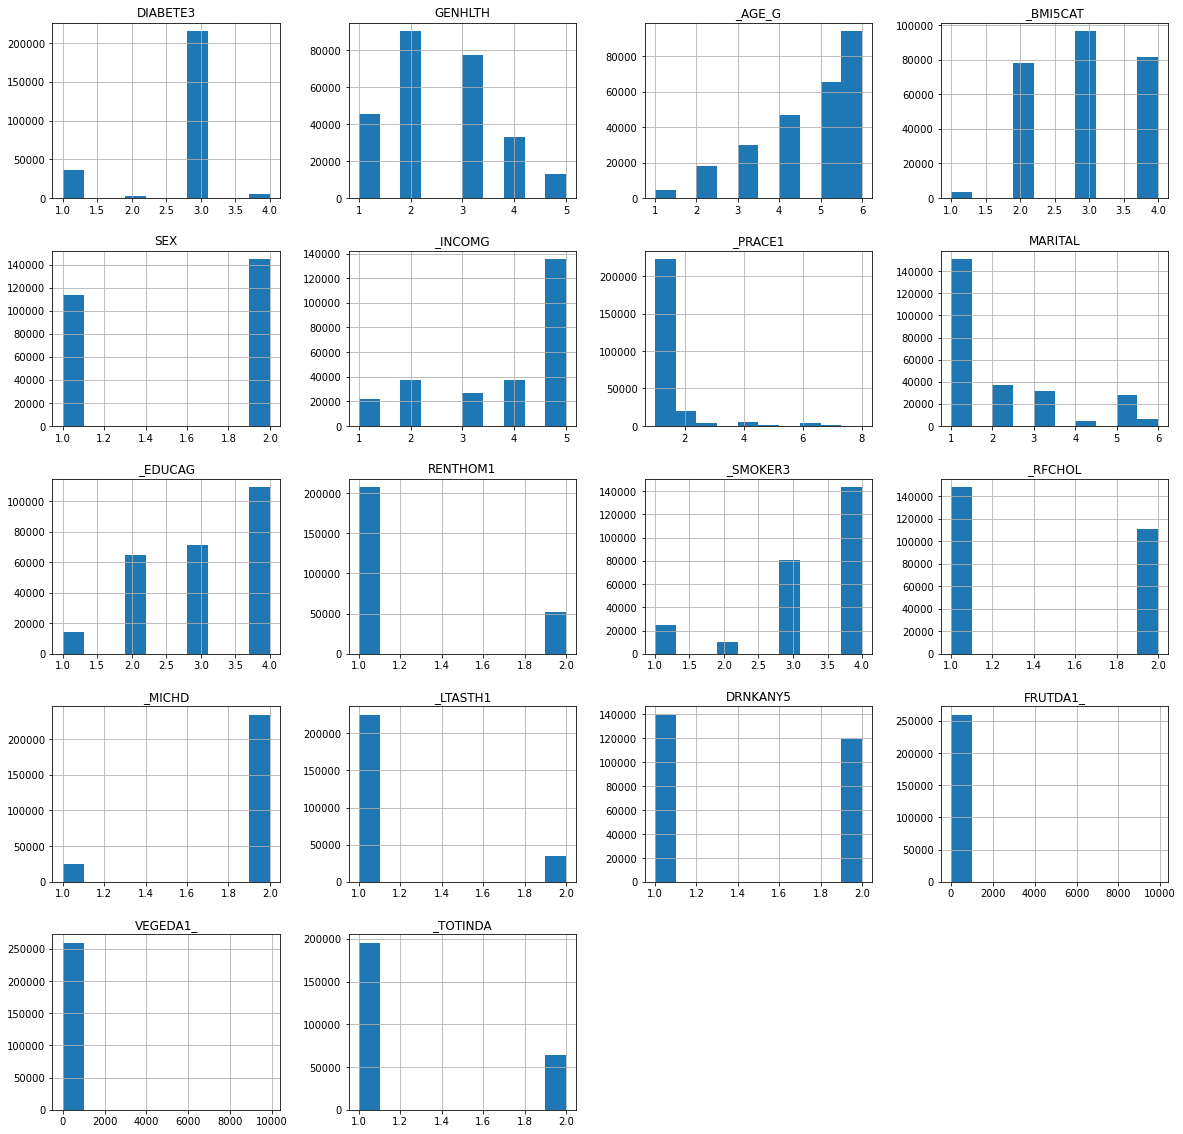

In [13]:
diabetesdata_2015_cleaned.hist(figsize = (20,20))
plt.show()

In [14]:
#sns.pairplot(data=diabetesdata_2015_cleaned, kind='reg')

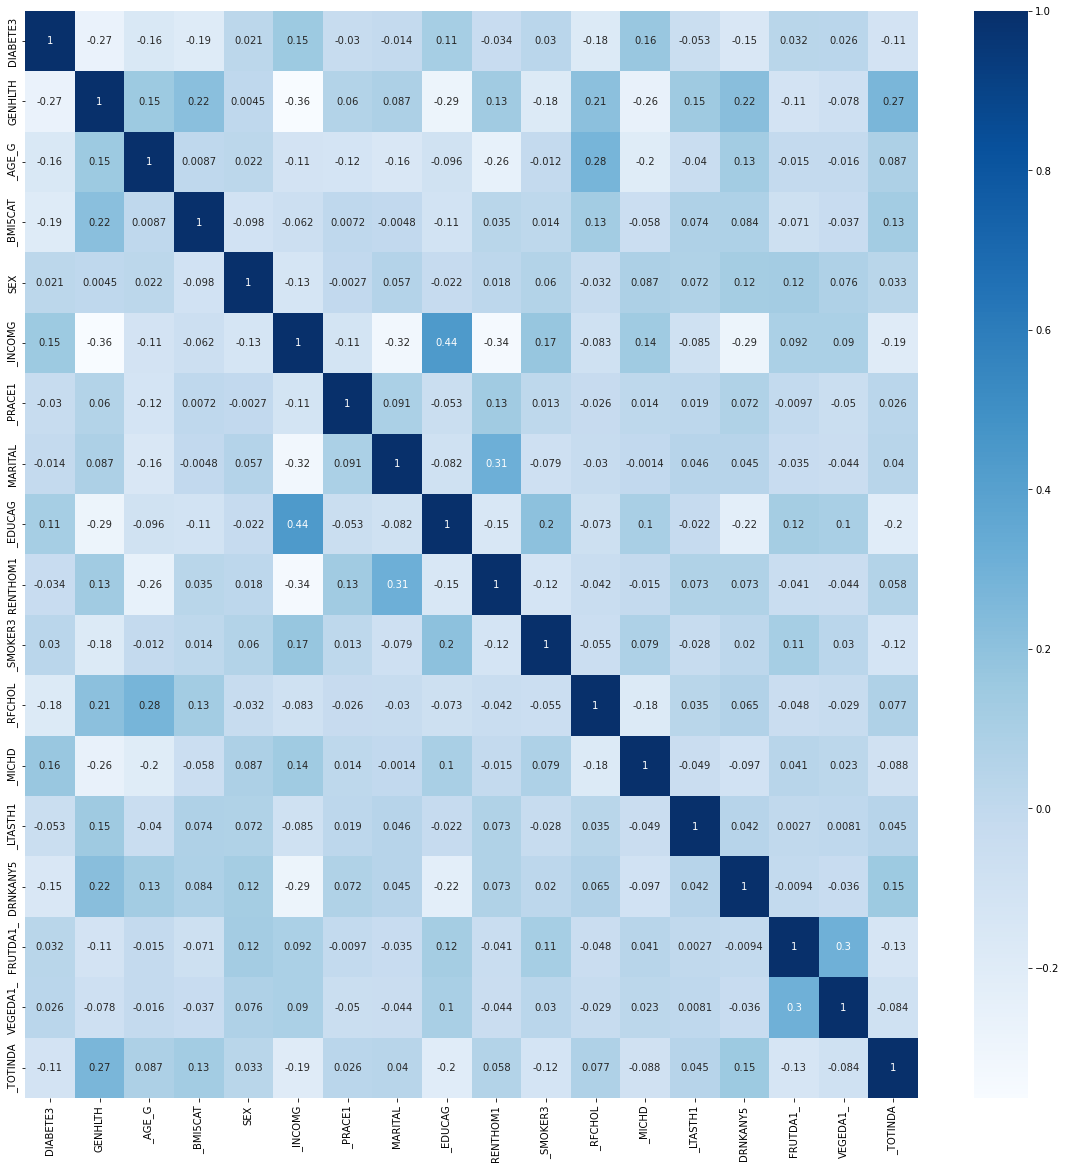

In [15]:
plt.figure(figsize=(20, 20))
sns.heatmap(data=diabetesdata_2015_cleaned.corr(), cmap='Blues', annot=True)
plt.show()

Checking and cleaning each column in the dataset since it contains mulitple classes that are irrelevant. For example, the main classifier contains 6 different option for whether or not a person has diabetes. For easier processing and analyzation, the class will be reduced to 1 or 0. 1 includes the prediabetes and diabetes persons while class 0 is for those without diabetes. The other classes are dropped since they relate to those who refused to answer (9) and those not sure (7).

In [16]:
diabetesdata_2015_cleaned['DIABETE3'].unique()

array([3., 1., 4., 2.])

In [17]:
diabetesdata_2015_cleaned.loc[:, 'DIABETE3'] = diabetesdata_2015_cleaned['DIABETE3'].replace({1:1, 2:1, 3:0, 4:0})

In [18]:
diabetesdata_2015_cleaned['DIABETE3'].unique()

array([0., 1.])

GENHLTH category correlates to health with classifiers such as Good or Better Health
Good or Better Health GENHLTH = 1 or 2 or 3
Fair or Poor Health GENHLTH = 4 or 5
Don’t know/Not Sure Or Refused/Miss GENHLTH = 7 or 9

In [19]:
diabetesdata_2015_cleaned['GENHLTH'].unique()

array([5., 3., 2., 4., 1.])

In [20]:
diabetesdata_2015_cleaned.loc[:, 'GENHLTH'] = diabetesdata_2015_cleaned['GENHLTH'].replace({1:1, 2:1, 3:1, 4:0, 5:0})

In [21]:
diabetesdata_2015_cleaned['GENHLTH'].unique()

array([0., 1.])

In [22]:
#delete spacer for copying

MARITAL category correlates to maritial status with classifiers such as Married = 1 and A member of unmarried couple = 6 while the Divorced, Widowed, Seperated, and Never Married categories will be one classifier.

In [23]:
diabetesdata_2015_cleaned['MARITAL'].unique()

array([1., 2., 3., 6., 5., 4.])

In [24]:
diabetesdata_2015_cleaned.loc[:, 'MARITAL'] = diabetesdata_2015_cleaned['MARITAL'].replace({1:1, 6:1, 2:0, 3:0, 4:0, 5:0})

In [25]:
diabetesdata_2015_cleaned['MARITAL'].unique()

array([1., 0.])

In [26]:
#delete spacer for copying

_SMOKER3 category correlates to whether or not respondent is a smoker with classifiers such as Current = 1 and Current on some days = 2 and Former = 3 and Never = 4.  

In [27]:
diabetesdata_2015_cleaned['_SMOKER3'].unique()

array([3., 1., 4., 2.])

In [28]:
diabetesdata_2015_cleaned.loc[:, '_SMOKER3'] = diabetesdata_2015_cleaned['_SMOKER3'].replace({1:1, 2:1, 3:1, 4:0})

In [29]:
diabetesdata_2015_cleaned['_SMOKER3'].unique()

array([1., 0.])

In [30]:
len(diabetesdata_2015_cleaned)

259178

Renaming of the column attributes for easier understanding on output results

In [31]:
diabetesdata_2015_cleaned.rename(columns={
    'DIABETE3': 'DiabetesIdentifier',
    'GENHLTH': 'GeneralHealth',
    '_AGE_G': 'AgeCategory',
    '_BMI5CAT': 'BMICategory',
    'SEX': 'Gender',
    '_INCOMG': 'IncomeLevel',
    '_PRACE1': 'Race',
    'MARITAL': 'MaritalStatus',
    '_EDUCAG': 'EducationLevel',
    'RENTHOM1': 'HousingStatus',
    '_SMOKER3': 'SmokingStatus',
    '_RFCHOL': 'CholesterolStatus',
    '_MICHD': 'ChronicDiseaseStatus',
    '_LTASTH1': 'AsthmaStatus',
    'DRNKANY5': 'AlcoholConsumption',
    'FRUTDA1_': 'FruitConsumptionDaily',
    'VEGEDA1_': 'VegetableConsumptionDaily',
    '_TOTINDA': 'PhysicalActivityStatus'
}, inplace=True)

In [32]:
diabetesdata_2015_cleaned.head()

,DiabetesIdentifier,GeneralHealth,AgeCategory,BMICategory,Gender,IncomeLevel,Race,MaritalStatus,EducationLevel,HousingStatus,SmokingStatus,CholesterolStatus,ChronicDiseaseStatus,AsthmaStatus,AlcoholConsumption,FruitConsumptionDaily,VegetableConsumptionDaily,PhysicalActivityStatus
0,0.0,0.0,5.0,4.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,33.0,100.0,2.0
1,0.0,1.0,4.0,3.0,2.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0,2.0,1.0,2.0,17.0,13.0,1.0
3,0.0,0.0,5.0,3.0,2.0,5.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0,2.0,100.0,14.0,2.0
5,0.0,1.0,6.0,3.0,2.0,4.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,100.0,100.0,1.0
6,0.0,1.0,6.0,2.0,2.0,2.0,1.0,0.0,3.0,1.0,0.0,2.0,2.0,1.0,1.0,29.0,71.0,1.0


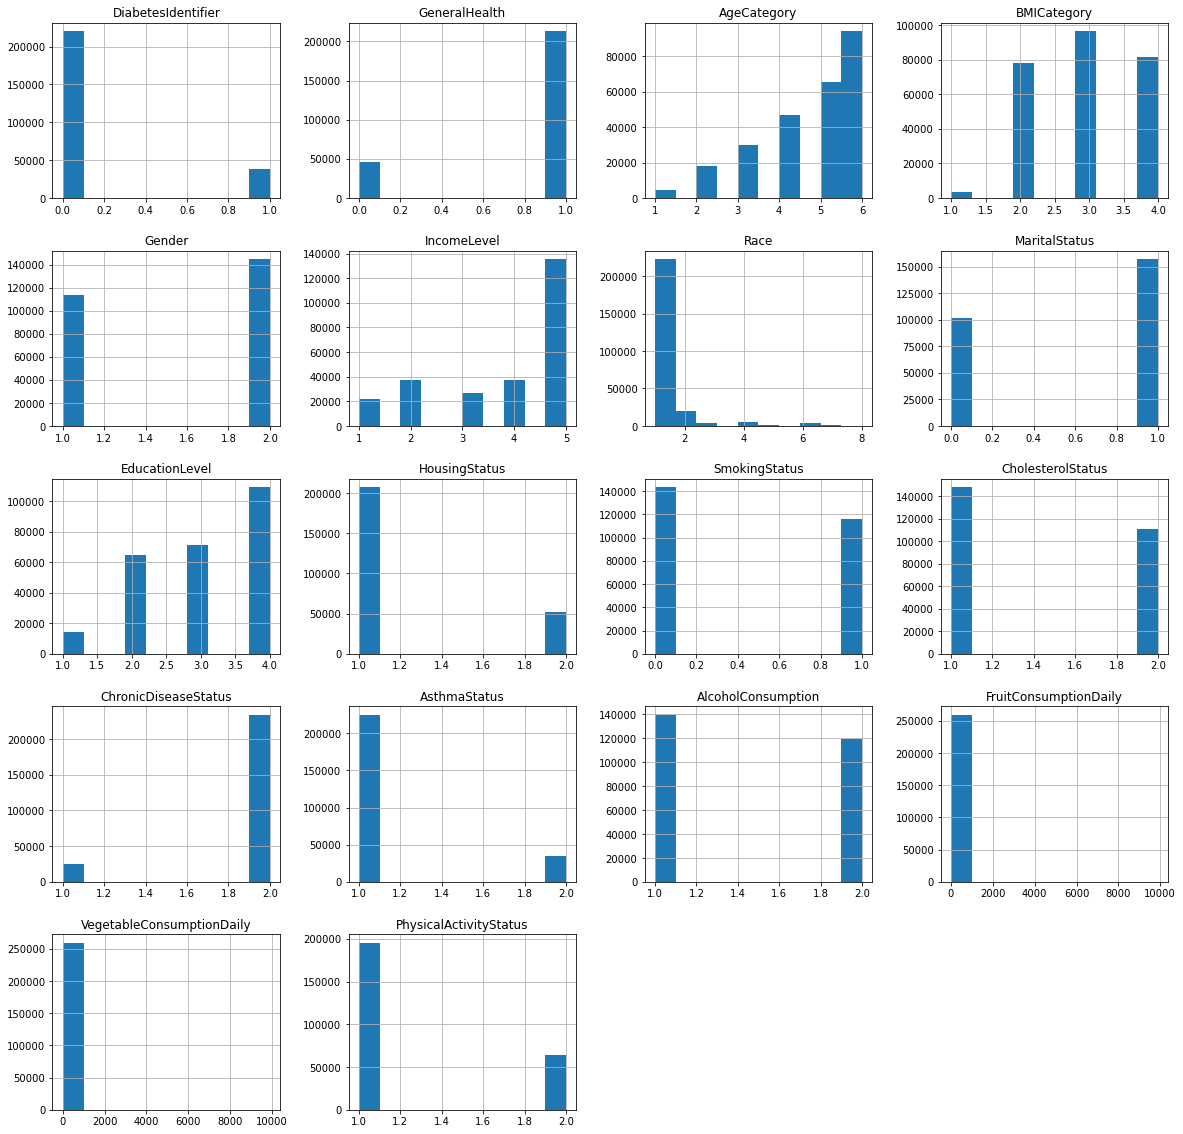

In [33]:
diabetesdata_2015_cleaned.hist(figsize = (20,20))
plt.show()

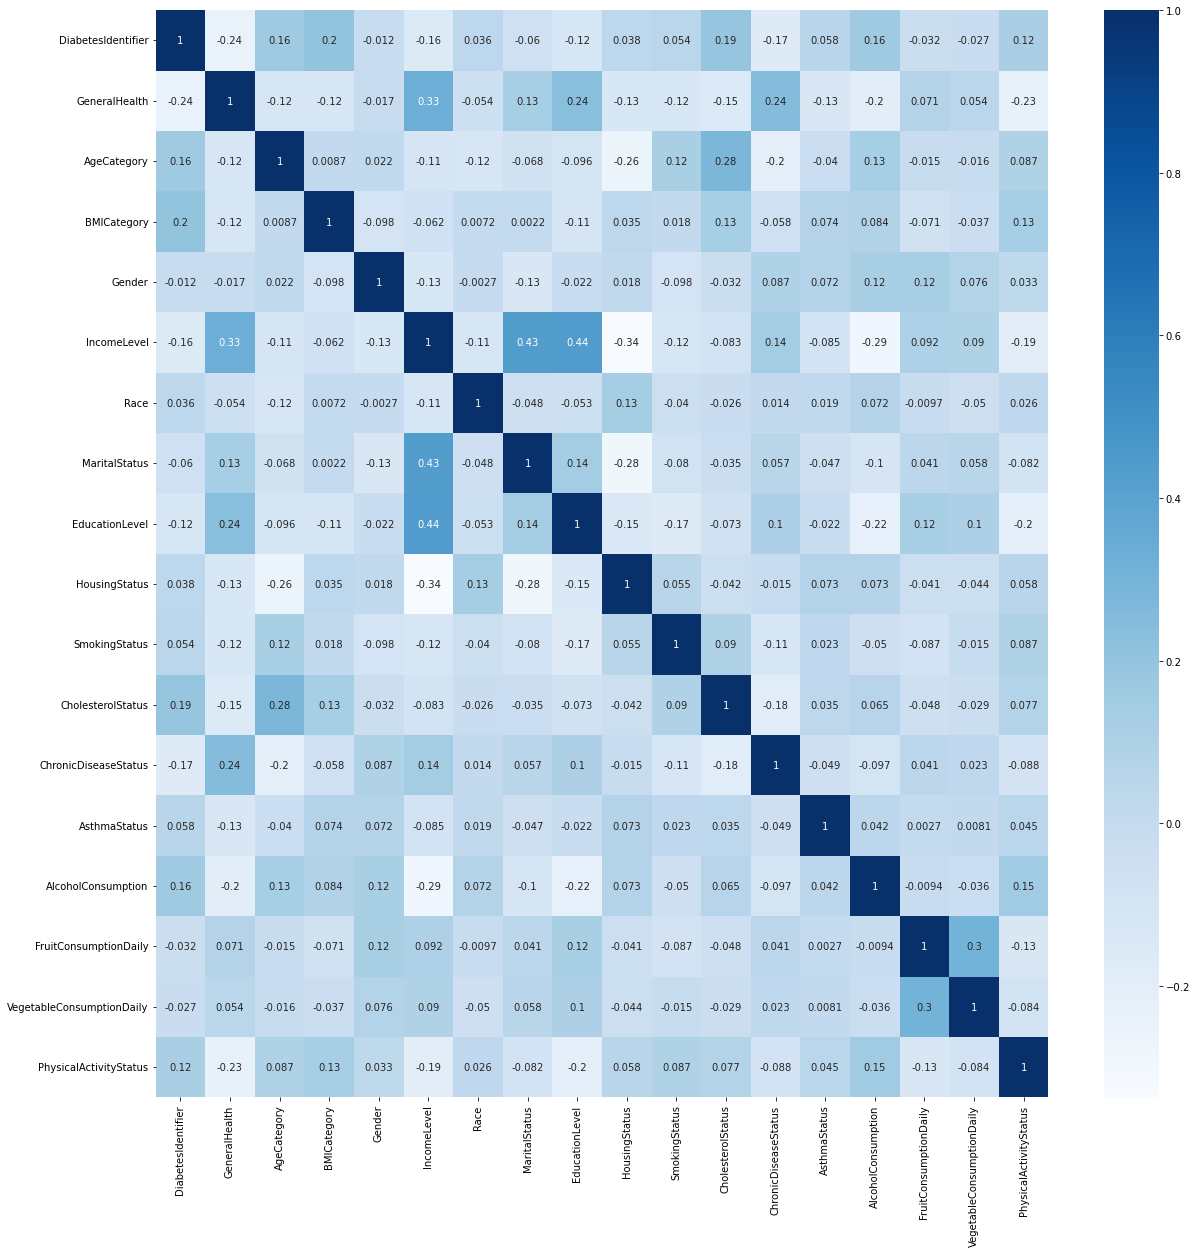

In [34]:
plt.figure(figsize=(20, 20))
sns.heatmap(data=diabetesdata_2015_cleaned.corr(), cmap='Blues', annot=True)
plt.show()

In [35]:
diabetesdata_2015_cleaned['DiabetesIdentifier'].value_counts() 
diabetesdata_2015_cleaned['DiabetesIdentifier'].value_counts(normalize=True)

0.0    0.851044
1.0    0.148956
Name: DiabetesIdentifier, dtype: float64

In [36]:
#creation of a personal identifier related to personal info sub dataframe
diabetesdata_personalinfo = diabetesdata_2015_cleaned.drop(columns=[
    'SmokingStatus', 
    'CholesterolStatus', 
    'ChronicDiseaseStatus', 
    'BMICategory', 
    'AsthmaStatus', 
    'AlcoholConsumption', 
    'FruitConsumptionDaily', 
    'VegetableConsumptionDaily', 
    'PhysicalActivityStatus'
]).copy()

In [37]:
diabetesdata_personalinfo['DiabetesIdentifier'].value_counts() 
diabetesdata_personalinfo['DiabetesIdentifier'].value_counts(normalize=True)

0.0    0.851044
1.0    0.148956
Name: DiabetesIdentifier, dtype: float64

In [38]:
#creation of a personal identifier related to current health status sub dataframe
diabetesdata_healthinfo = diabetesdata_2015_cleaned.drop(columns=[
    'GeneralHealth',
    'AgeCategory',
    'BMICategory',
    'Gender',
    'IncomeLevel',
    'Race',
    'MaritalStatus',
    'EducationLevel',
    'HousingStatus' 
]).copy()

In [39]:
diabetesdata_healthinfo['DiabetesIdentifier'].value_counts() 
diabetesdata_healthinfo['DiabetesIdentifier'].value_counts(normalize=True)

0.0    0.851044
1.0    0.148956
Name: DiabetesIdentifier, dtype: float64

Start of Analysis for Logisitic Regression

In [40]:
X = diabetesdata_personalinfo.drop('DiabetesIdentifier', axis=1) 
y = diabetesdata_personalinfo['DiabetesIdentifier'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [41]:
diabetes_logreg_model = LogisticRegression( max_iter=1000)
diabetes_logreg_model.fit(X_train, y_train)

predictions = diabetes_logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy score is", accuracy)

Accuracy score is 0.8480013889960645


In [42]:
y_prediction = diabetes_logreg_model.predict(X_test)

In [43]:
report = classification_report(y_test, y_prediction)
print(report)

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     43981
         1.0       0.46      0.02      0.04      7855

    accuracy                           0.85     51836
   macro avg       0.66      0.51      0.48     51836
weighted avg       0.79      0.85      0.78     51836



In [44]:
X = diabetesdata_healthinfo.drop('DiabetesIdentifier', axis=1) 
y = diabetesdata_healthinfo['DiabetesIdentifier'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
diabetes_logreg_model = LogisticRegression(max_iter=1000)
diabetes_logreg_model.fit(X_train, y_train)

predictions = diabetes_logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy score is", accuracy)

Accuracy score is 0.8485415541322633


In [45]:
predictions = diabetes_logreg_model.predict(X_test)

In [46]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     43981
         1.0       0.50      0.04      0.08      7855

    accuracy                           0.85     51836
   macro avg       0.68      0.52      0.50     51836
weighted avg       0.80      0.85      0.79     51836



After seeing that there was not a difference in accuracy between the two subsets, it was decided to continue using the overall set moving forward. 

In [65]:
X = diabetesdata_2015_cleaned.drop('DiabetesIdentifier', axis=1) 
y = diabetesdata_2015_cleaned['DiabetesIdentifier'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55, stratify=y)
diabetes_logreg_model = LogisticRegression(max_iter=1000)
diabetes_logreg_model.fit(X_train, y_train)

predictions = diabetes_logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy score is", accuracy)

Accuracy score is 0.8538081642102014


In [66]:
predictions = diabetes_logreg_model.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     44115
         1.0       0.54      0.13      0.21      7721

    accuracy                           0.85     51836
   macro avg       0.70      0.56      0.57     51836
weighted avg       0.82      0.85      0.81     51836



Start of Analysis for SVM

In [67]:
X = diabetesdata_2015_cleaned.drop('DiabetesIdentifier', axis=1) 
y = diabetesdata_2015_cleaned['DiabetesIdentifier'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55, stratify=y)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
diabetes_svm_model = svm.SVC(kernel='linear')
diabetes_svm_model.fit(X_train, y_train)

In [ ]:
predictions = diabetes_svm_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy score is", accuracy)

In [ ]:
report = classification_report(y_test, predictions)
print(report)

Start of Analysis for Decision Trees

In [57]:
X = diabetesdata_2015_cleaned.drop('DiabetesIdentifier', axis=1) 
y = diabetesdata_2015_cleaned['DiabetesIdentifier'] 

In [62]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55, stratify=y)

In [63]:
diabetes_decisiontree_model = DecisionTreeClassifier()
diabetes_decisiontree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
predictions = diabetes_decisiontree_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy score is", accuracy)

Accuracy score is 0.7825642410679836


In [61]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     44115
         1.0       0.28      0.28      0.28      7721

    accuracy                           0.78     51836
   macro avg       0.57      0.58      0.58     51836
weighted avg       0.78      0.78      0.78     51836



Start of Analysis for Random Forests

In [ ]:
diabetes_randomforest_model = RandomForestClassifier()
diabetes_randomforest_model.fit(X_train, y_train)

In [ ]:
predictions = diabetes_randomforest_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy score is", accuracy)

In [ ]:
report = classification_report(y_test, predictions)
print(report)